In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
directory = 'C:\\Users\\fabia\\OneDrive\\Escritorio\\ANALISIS DE DATOS\\1 REGRESION LINEAL'

In [18]:
dataframes = []
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        path = os.path.join(directory, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

In [19]:

combined_df = pd.concat(dataframes, ignore_index=True)


In [38]:
print(combined_df.head())

  car_name  selling_price  present_price  kms_driven seller_type transmission  \
0     ritz           3.35           5.59     27000.0      Dealer       Manual   
1      sx4           4.75           9.54     43000.0      Dealer       Manual   
2     ciaz           7.25           9.85      6900.0      Dealer       Manual   
3  wagon r           2.85           4.15      5200.0      Dealer       Manual   
4    swift           4.60           6.87     42450.0      Dealer       Manual   

  owner  selling_price  km_driven fuel  ... max power max torque drivetrain  \
0     0            NaN        NaN  NaN  ...       NaN        NaN        NaN   
1     0            NaN        NaN  NaN  ...       NaN        NaN        NaN   
2     0            NaN        NaN  NaN  ...       NaN        NaN        NaN   
3     0            NaN        NaN  NaN  ...       NaN        NaN        NaN   
4     0            NaN        NaN  NaN  ...       NaN        NaN        NaN   

   length width height seating capacit

In [39]:
print(combined_df.describe())

       selling_price  present_price     kms_driven  selling_price  \
count     301.000000     301.000000     301.000000   1.246800e+04   
mean        4.661296       7.628472   36947.205980   5.915773e+05   
std         5.082812       8.644115   38886.883882   7.377876e+05   
min         0.100000       0.320000     500.000000   2.000000e+04   
25%         0.900000       1.200000   15000.000000   2.400000e+05   
50%         3.600000       6.400000   32000.000000   4.200000e+05   
75%         6.000000       9.900000   48767.000000   6.500000e+05   
max        35.000000      92.600000  500000.000000   1.000000e+07   

          km_driven  mileage        seats         price     kilometer  \
count  1.246800e+04      0.0  7907.000000  2.059000e+03  2.059000e+03   
mean   6.856508e+04      NaN     5.416719  1.702992e+06  5.422471e+04   
std    5.333721e+04      NaN     0.959588  2.419881e+06  5.736172e+04   
min    1.000000e+00      NaN     2.000000  4.900000e+04  0.000000e+00   
25%    3.5000

In [40]:
print(combined_df.isnull().sum())

car_name              14527
selling_price         14527
present_price         14527
kms_driven            14527
seller_type           14527
transmission          12468
owner                 12468
selling_price          2360
km_driven              2360
fuel                   2360
seller_type            2360
transmission           2360
owner                  2360
mileage               14828
engine                 6921
max_power              6915
torque                 6922
seats                  6921
make                  12769
model                 12769
price                 12769
kilometer             12769
fuel type             12769
location              12769
color                 12769
seller type           12769
engine                12849
max power             12849
max torque            12849
drivetrain            12905
length                12833
width                 12833
height                12833
seating capacity      12833
fuel tank capacity    12882
fuel_type_Diesel    

In [41]:
umbral = 0.6  
combined_df = combined_df.loc[:, combined_df.isnull().mean() < umbral]

In [42]:
for col in combined_df.select_dtypes(include=np.number).columns:
    combined_df[col].fillna(combined_df[col].median(), inplace=True)

In [43]:
for col in combined_df.select_dtypes(include=['object']).columns:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)


In [44]:
print(combined_df.isnull().sum())

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
engine              0
max_power           0
torque              0
seats               0
fuel_type_Diesel    0
fuel_type_Petrol    0
dtype: int64


In [45]:
categorical_cols = combined_df.select_dtypes(include=['object']).columns

In [46]:
combined_df_encoded = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)


In [47]:
print(combined_df_encoded.head())

   selling_price  km_driven  seats  fuel_type_Diesel  fuel_type_Petrol  \
0       420000.0    60000.0    5.0             False              True   
1       420000.0    60000.0    5.0              True             False   
2       420000.0    60000.0    5.0             False              True   
3       420000.0    60000.0    5.0             False              True   
4       420000.0    60000.0    5.0              True             False   

   fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0         True          False     False        False                    True   
1         True          False     False        False                    True   
2         True          False     False        False                    True   
3         True          False     False        False                    True   
4         True          False     False        False                    True   

   ...  torque_96.1Nm@ 3000rpm  torque_96Nm@ 2500rpm  torque_96Nm@ 3000rpm

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = combined_df_encoded.drop('selling_price', axis=1)  
y = combined_df_encoded['selling_price']  


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)

Datos de entrenamiento: (11862, 896)
Datos de prueba: (2966, 896)


In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
linear_model = LinearRegression()


In [54]:
linear_model.fit(X_train, y_train)


LinearRegression()

In [55]:
y_pred = linear_model.predict(X_test)


In [56]:
print("Coeficientes:", linear_model.coef_)

Coeficientes: [-1.43649842e+00  2.46361614e+04 -9.83721446e+04 -9.83721394e+04
  2.14394622e+05 -6.28349520e+05 -3.55584932e+04 -2.58585172e+04
 -1.14586796e+05  1.47934885e+04 -5.86721822e+05 -1.24867186e+05
 -6.40636897e+04  3.48875454e+05 -8.32237564e+04  1.75346020e+12
  1.32085289e+12 -2.96272817e+12  2.30312806e+11 -9.65908701e+10
  6.25193468e+11 -9.09912396e+10 -7.31243110e+11 -1.26359222e+12
 -2.58527511e+11  2.55995045e+11  2.55994949e+11 -4.08243308e+11
 -2.58527591e+11  3.79044212e+10  8.28964481e+11 -1.14649635e+12
 -3.81027356e+11 -1.24779400e+12 -1.35434360e+11 -6.18906907e+11
  8.60659590e+11  7.25624376e+11 -2.25255120e+05  8.60659526e+11
 -2.81015685e+05  4.07573036e+11 -2.65605528e+11  5.50764574e+11
 -3.82833432e+11  4.02438744e+10  1.07577194e+12 -3.67921675e+11
  5.52459037e+11 -1.03751512e+11 -3.15546618e+11 -3.15546793e+11
 -3.07819265e+11 -8.08565620e+11 -3.26756282e+11 -1.13615577e+11
  1.50699308e+12  9.77208761e+11 -1.89029500e+11  3.84773661e+11
 -3.1554637

In [57]:
print("Intercepción:", linear_model.intercept_)

Intercepción: 34067998697.19093


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
print('R^2:', r2_score(y_test, y_pred))

R^2: -21390960048.637745


In [60]:
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 101964046408.09515


In [61]:
print('MAE:', mean_squared_error(y_test, y_pred, squared=True))

MAE: 1.0396666759912182e+22


In [62]:
feature = X_train.columns[0]
X_train_feature = X_train[feature].values.reshape(-1, 1)  
X_test_feature = X_test[feature].values.reshape(-1, 1)


In [63]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_feature, y_train)

LinearRegression()

In [64]:
x_range = np.linspace(X_train_feature.min(), X_train_feature.max(), 100).reshape(-1, 1)
y_range = simple_linear_model.predict(x_range)

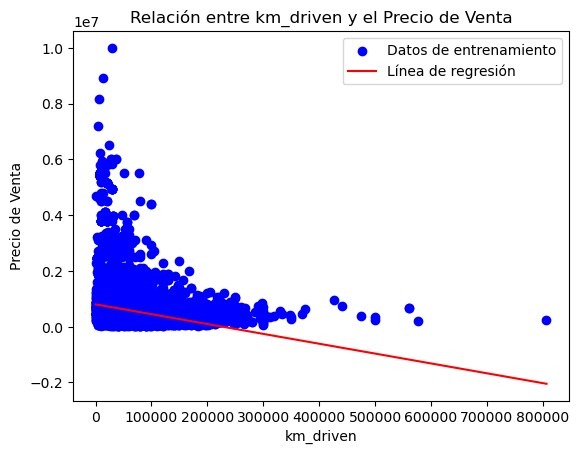

In [65]:
plt.scatter(X_train_feature, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(x_range, y_range, color='red', label='Línea de regresión')
plt.title('Relación entre {} y el Precio de Venta'.format(feature))
plt.xlabel(feature)
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [77]:
def evaluar_modelo(X, y, nombre_del_conjunto, modelo):
    y_pred = modelo.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Resultados de la evaluación del modelo en el conjunto de {nombre_del_conjunto}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")
    print()

In [78]:
evaluar_modelo(X_train, y_train, 'entrenamiento', linear_model)
evaluar_modelo(X_test, y_test, 'prueba', linear_model)

Resultados de la evaluación del modelo en el conjunto de entrenamiento:
MSE: 85465252726.37488
RMSE: 292344.40772208193
MAE: 146463.6040947126
R^2: 0.8123650471817863

Resultados de la evaluación del modelo en el conjunto de prueba:
MSE: 1.0396666759912182e+22
RMSE: 101964046408.09515
MAE: 6028972496.337974
R^2: -21390960048.637745

